In [1]:
import numpy as np
import mnist
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils as utils
import matplotlib.pyplot as plt

In [2]:
# esthetic definitions for the plots
font = {'size'   : 18, 'family':'STIXGeneral'}
axislabelfontsize='large'
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
# mnist data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
test_images = test_images.reshape(test_images.shape[0],28,28,1).astype('float32')

train_images = train_images/255
test_images = test_images/255


train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
# Conv2D model!
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [6]:
# Train the model.
train = model.fit(
  train_images,
  train_labels,
  epochs=10,
  batch_size=200,
  validation_data=(test_images,test_labels)
)

predc = model.predict(test_images)

Epoch 1/10
300/300 [==============================] - 23s 75ms/step - loss: 0.4209 - accuracy: 0.8761 - val_loss: 0.0434 - val_accuracy: 0.9857
Epoch 2/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0400 - val_accuracy: 0.9867
Epoch 3/10
300/300 [==============================] - 22s 74ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 4/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 5/10
300/300 [==============================] - 22s 73ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0234 - val_accuracy: 0.9922
Epoch 6/10
300/300 [==============================] - 22s 74ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 7/10
300/300 [==============================] - 21s 72ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0434 - val_accuracy:

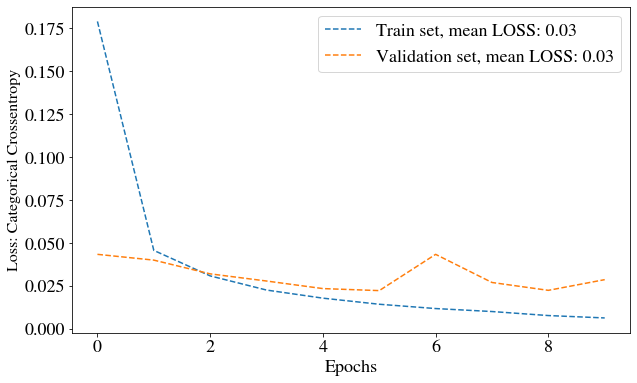

<Figure size 720x432 with 0 Axes>

In [7]:
plt.plot(train.history['loss'],'--',label=r'Train set, mean LOSS: %.2f'%np.mean(train.history['loss']))
plt.plot(train.history['val_loss'],'--',label=r'Validation set, mean LOSS: %.2f'%np.mean(train.history['val_loss']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Loss: Categorical Crossentropy', fontsize=16)
plt.legend(loc='upper right')
plt.show()

plt.savefig('cnn-mnist_loss.pdf')

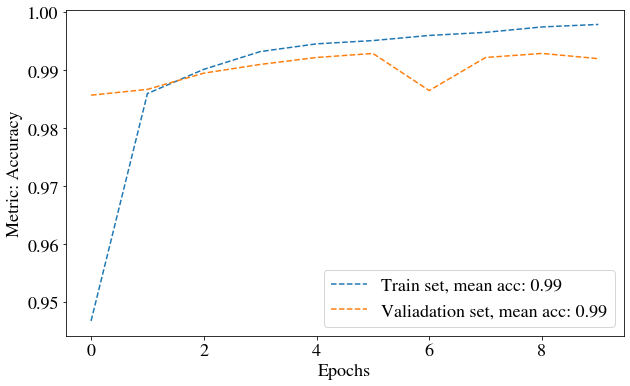

<Figure size 720x432 with 0 Axes>

In [8]:
plt.plot(train.history['accuracy'],'--',label=r'Train set, mean acc: %.2f'%np.mean(train.history['accuracy']))
plt.plot(train.history['val_accuracy'],'--',label=r'Valiadation set, mean acc: %.2f'%np.mean(train.history['val_accuracy']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Metric: Accuracy', fontsize=18)
plt.legend(loc='lower right')
plt.show()

plt.savefig('cnn-mnist_acc.pdf')

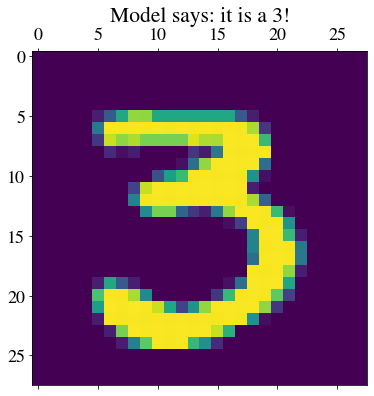

In [9]:
ransec = np.random.randint(0,10000)

p = np.argmax(predc[ransec])
plt.matshow(test_images[ransec].reshape(28,28))
plt.title('Model says: it is a %i!'%p)

plt.show()